In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define CSV paths
single_prompt_path = "../results/single-prompt/*.csv"  # Adjusted for single-prompt (matches your folder name)
multi_turn_path = "../results/multi-turn/*.csv"  # Adjusted for multi-turn

# Load single-prompt test results
single_prompt_files = glob.glob(single_prompt_path)
# Load multi-turn test results
multi_turn_files = glob.glob(multi_turn_path)

#Print files
print("Single-Prompt Files:", single_prompt_files)
print("Multi-Turn Files:", multi_turn_files)




Single-Prompt Files: ['../results/single-prompt/comparison_of_single_prompt_responses_1_u1.csv', '../results/single-prompt/comparison_of_single_prompt_responses_3_u1.csv', '../results/single-prompt/comparison_of_single_prompt_responses_7_u1.csv', '../results/single-prompt/comparison_of_single_prompt_responses_5_u1.csv', '../results/single-prompt/comparison_of_single_prompt_responses_2_u1.csv', '../results/single-prompt/comparison_of_single_prompt_responses_6_u1.csv', '../results/single-prompt/comparison_of_single_prompt_responses_8_u1.csv', '../results/single-prompt/comparison_of_single_prompt_responses_4_u1.csv']
Multi-Turn Files: ['../results/multi-turn/multi_turn_response_comparison5.csv', '../results/multi-turn/multi_turn_response_comparison4.csv', '../results/multi-turn/multi_turn_response_comparison1.csv', '../results/multi-turn/multi_turn_response_comparison3.csv', '../results/multi-turn/multi_turn_response_comparison2.csv']


/var/folders/1l/d95jkyy90vs5p4tnw22bzkth0000gn/T/ipykernel_14289/2044158283.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_counts.index, y=model_counts.values, palette="coolwarm")


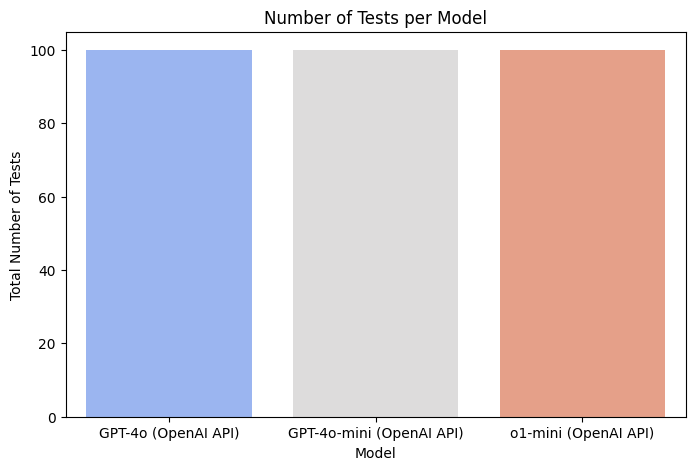

In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define CSV paths
single_prompt_path = "../results/single-prompt/*.csv" 
multi_turn_path = "../results/multi-turn/*.csv"  

# Load single-prompt test results
single_prompt_files = glob.glob(single_prompt_path)
df_single = pd.concat([pd.read_csv(file) for file in single_prompt_files], ignore_index=True)

# Load multi-turn test results
multi_turn_files = glob.glob(multi_turn_path)
df_multi = pd.concat([pd.read_csv(file) for file in multi_turn_files], ignore_index=True)

# Merge both parts into df
df_all = pd.concat([df_single, df_multi], ignore_index=True)



"""Overall performance"""

# Count model occurrences
model_counts = df_all["Model"].value_counts()

# Plot occurences for models
plt.figure(figsize=(8, 5))
sns.barplot(x=model_counts.index, y=model_counts.values, palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("Total Number of Tests")
plt.title("Number of Tests per Model")
plt.show()


/var/folders/1l/d95jkyy90vs5p4tnw22bzkth0000gn/T/ipykernel_14289/2598646136.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


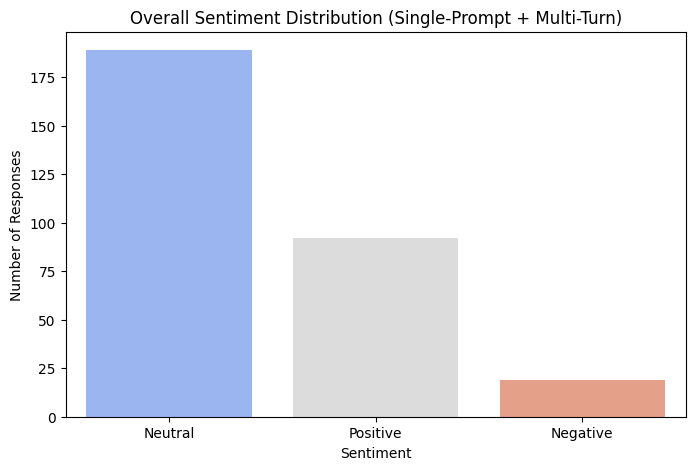

In [3]:
from textblob import TextBlob

# Compute sentiment polarity
def get_sentiment(text):
    if pd.isna(text):  # Handle empty or NaN responses
        return "Neutral"
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df_all["Sentiment"] = df_all["Response"].apply(get_sentiment)

# Count sentiment distribution
sentiment_counts = df_all["Sentiment"].value_counts()

# Plot distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.xlabel("Sentiment")
plt.ylabel("Number of Responses")
plt.title("Overall Sentiment Distribution (Single-Prompt + Multi-Turn)")
plt.show()


/var/folders/1l/d95jkyy90vs5p4tnw22bzkth0000gn/T/ipykernel_14289/3848168227.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_response_length_chars.index, y=avg_response_length_chars.values, palette="coolwarm")


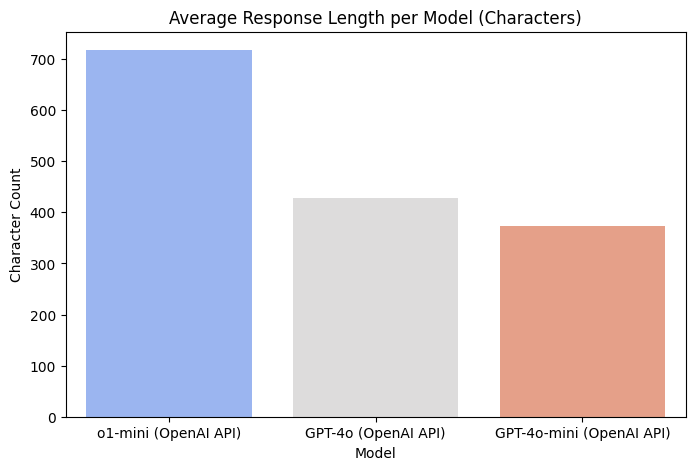

/var/folders/1l/d95jkyy90vs5p4tnw22bzkth0000gn/T/ipykernel_14289/3848168227.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_response_length_words.index, y=avg_response_length_words.values, palette="coolwarm")


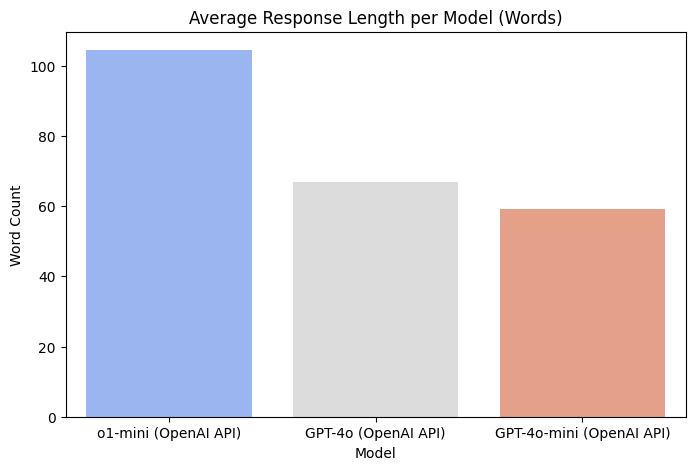

In [4]:
# Compute char count
df_all["Response Length (Characters)"] = df_all["Response"].apply(lambda x: len(str(x)))

# Compute word count
df_all["Response Length (Words)"] = df_all["Response"].apply(lambda x: len(str(x).split()))

# Avg CC per model
avg_response_length_chars = df_all.groupby("Model")["Response Length (Characters)"].mean().sort_values(ascending=False)

# Avg WC per model
avg_response_length_words = df_all.groupby("Model")["Response Length (Words)"].mean().sort_values(ascending=False)

# Plot char counts
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_response_length_chars.index, y=avg_response_length_chars.values, palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("Character Count")
plt.title("Average Response Length per Model (Characters)")
plt.show()

# Plot word counts
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_response_length_words.index, y=avg_response_length_words.values, palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("Word Count")
plt.title("Average Response Length per Model (Words)")
plt.show()


In [ ]:
# Load single-prompt results
single_prompt_files = glob.glob("../results/single-prompt/*.csv") 
df_single_prompt = pd.concat([pd.read_csv(file) for file in single_prompt_files], ignore_index=True)

# Debugging
print("Tests in dataset:", df_single_prompt["Test Name"].unique())

# Ensure necessaryy columns
if "Model" in df_single_prompt.columns and "Response" in df_single_prompt.columns:
    print(f"Single-Prompt dataset successfully filtered! {df_single_prompt.shape[0]} responses found.")
else:
    print("Error: Columns missing in single-prompt dataset. Check CSV structure.")



Tests in dataset: ['General Questions' 'Emotional Intelligence & Emotional Expression'
 'Slang & Informal Language' 'Boundaries, Restrictions & Censorship'
 'Simple & Creative Challenges' 'Ethical Dilemas & Nuanced Reasoning'
 'Philosophy & Abstract Thinking' 'Personality & Interest']
Single-Prompt dataset successfully filtered! 120 responses found.


/var/folders/1l/d95jkyy90vs5p4tnw22bzkth0000gn/T/ipykernel_14289/1816147441.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_counts_single.index, y=model_counts_single.values, palette="coolwarm")


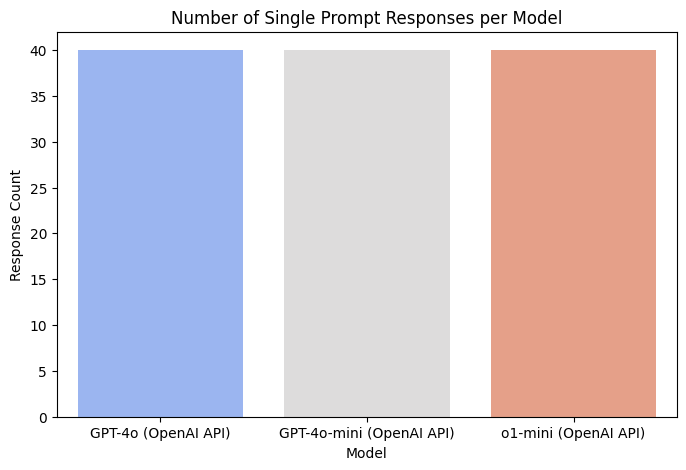

In [6]:
# Count model occurrences
model_counts_single = df_single_prompt["Model"].value_counts()

# Plot response count
plt.figure(figsize=(8, 5))
sns.barplot(x=model_counts_single.index, y=model_counts_single.values, palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("Response Count")
plt.title("Number of Single Prompt Responses per Model")
plt.show()


In [9]:
sentiment_counts = df_single_prompt["Sentiment"].value_counts(bins=[-1, -0.5, 0, 0.5, 1])
print(sentiment_counts)

(0.0, 0.5]        83
(-0.5, 0.0]       24
(0.5, 1.0]         9
(-1.001, -0.5]     4
Name: count, dtype: int64


count    120.000000
mean       0.126176
std        0.233035
min       -0.500000
25%        0.017843
50%        0.107908
75%        0.204477
max        1.000000
Name: Sentiment, dtype: float64


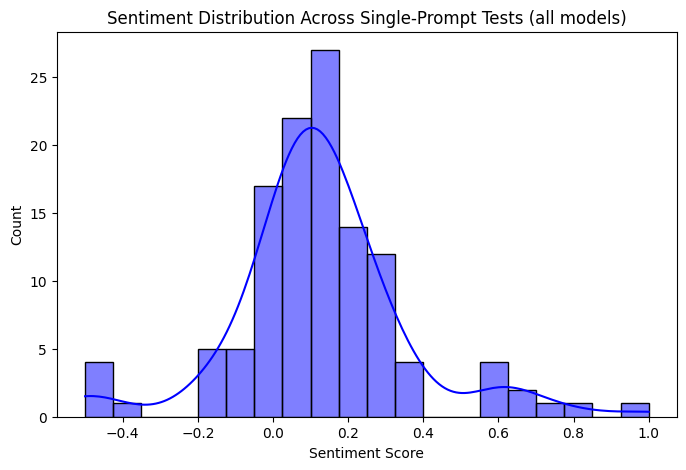

In [8]:
from textblob import TextBlob

# Compute sentiment polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply sentiment analysis
df_single_prompt["Sentiment"] = df_single_prompt["Response"].apply(get_sentiment)

# Verify sentiment distribution
print(df_single_prompt["Sentiment"].describe())

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_single_prompt["Sentiment"], bins=20, kde=True, color="blue")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.title("Sentiment Distribution Across Single-Prompt Tests (all models)")
plt.show()


/var/folders/1l/d95jkyy90vs5p4tnw22bzkth0000gn/T/ipykernel_14289/3582176622.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_response_length_char.index, y=avg_response_length_char.values, palette="coolwarm")


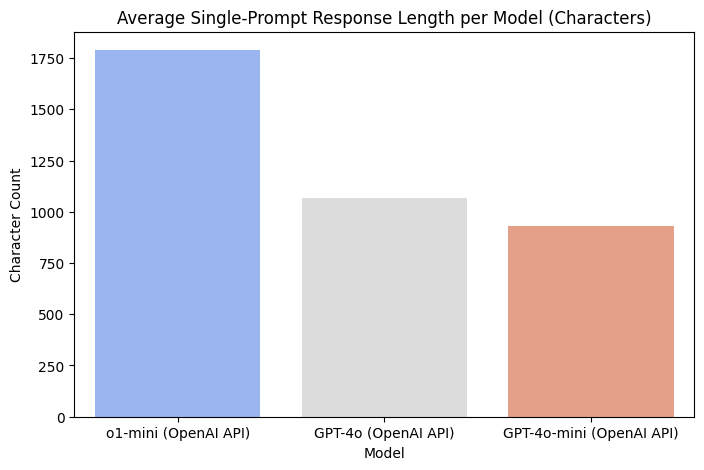

/var/folders/1l/d95jkyy90vs5p4tnw22bzkth0000gn/T/ipykernel_14289/3582176622.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_response_length_words.index, y=avg_response_length_words.values, palette="coolwarm")


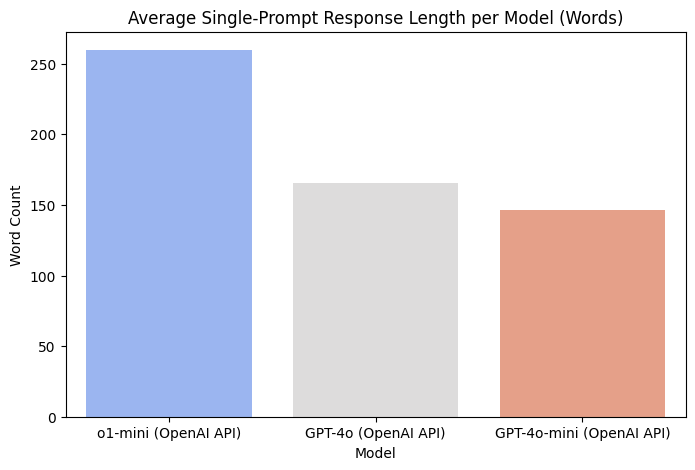

In [10]:
# Ensure response length columns exist in single-prompt dataset
df_single_prompt["Character Count"] = df_single_prompt["Response"].apply(lambda x: len(str(x)))
df_single_prompt["Word Count"] = df_single_prompt["Response"].apply(lambda x: len(str(x).split()))

# Find avg CC
avg_response_length_char = df_single_prompt.groupby("Model")["Character Count"].mean().sort_values(ascending=False)

# Find avg WC
avg_response_length_words = df_single_prompt.groupby("Model")["Word Count"].mean().sort_values(ascending=False)

# Plot CC
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_response_length_char.index, y=avg_response_length_char.values, palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("Character Count")
plt.title("Average Single-Prompt Response Length per Model (Characters)")
plt.show()

# Plot WC
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_response_length_words.index, y=avg_response_length_words.values, palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("Word Count")
plt.title("Average Single-Prompt Response Length per Model (Words)")
plt.show()


/var/folders/1l/d95jkyy90vs5p4tnw22bzkth0000gn/T/ipykernel_14289/2623867085.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_response_length_char_test.index, y=avg_response_length_char_test.values, palette="coolwarm")


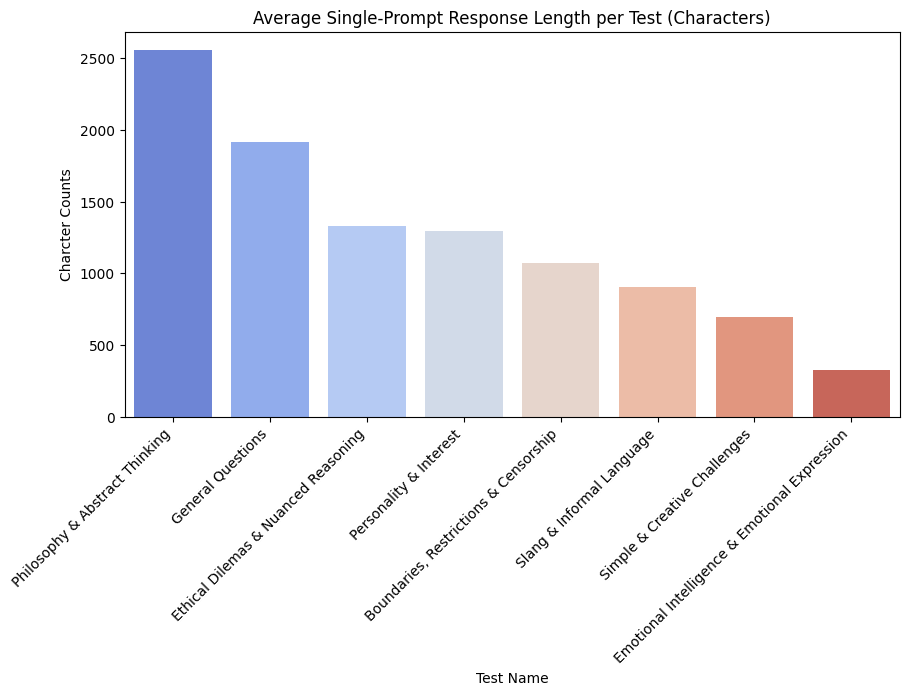

/var/folders/1l/d95jkyy90vs5p4tnw22bzkth0000gn/T/ipykernel_14289/2623867085.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_response_length_words_test.index, y=avg_response_length_words_test.values, palette="coolwarm")


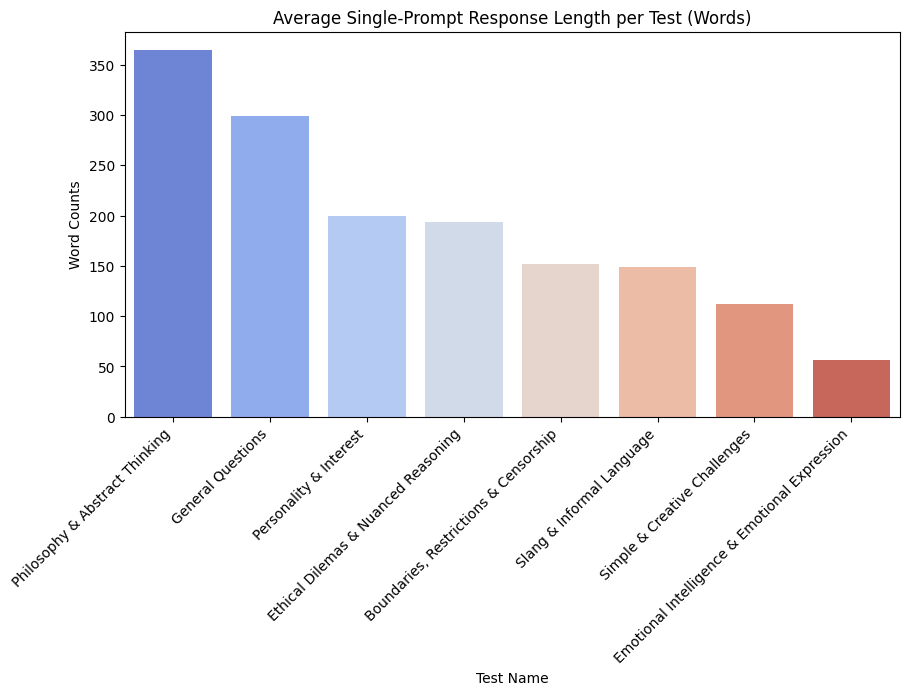

In [11]:
# Check for res. lenghts in dataset
df_single_prompt["Character Count"] = df_single_prompt["Response"].apply(lambda x: len(str(x)))
df_single_prompt["Word Count"] = df_single_prompt["Response"].apply(lambda x: len(str(x).split()))

# Find avg CC by test
avg_response_length_char_test = df_single_prompt.groupby("Test Name")["Character Count"].mean().sort_values(ascending=False)

# Find avg WC by test
avg_response_length_words_test = df_single_prompt.groupby("Test Name")["Word Count"].mean().sort_values(ascending=False)

# Plot char counts by test
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_response_length_char_test.index, y=avg_response_length_char_test.values, palette="coolwarm")
plt.xlabel("Test Name")
plt.ylabel("Charcter Counts")
plt.title("Average Single-Prompt Response Length per Test (Characters)")
plt.xticks(rotation=45, ha="right")
plt.show()

# Plot word counts by test
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_response_length_words_test.index, y=avg_response_length_words_test.values, palette="coolwarm")
plt.xlabel("Test Name")
plt.ylabel("Word Counts")
plt.title("Average Single-Prompt Response Length per Test (Words)")
plt.xticks(rotation=45, ha="right")
plt.show()


In [12]:
import pandas as pd
import glob

# Load multi-turn test results
multi_turn_files = glob.glob("../results/multi-turn/*.csv") 
df_multi_turn = pd.concat([pd.read_csv(file) for file in multi_turn_files], ignore_index=True)

# Debugging
print("Tests in dataset:", df_multi_turn["Test Name"].unique())

# Ensure necessary columns
if "Model" in df_multi_turn.columns and "Bot Response" in df_multi_turn.columns:
    print(f"Multi-Turn dataset successfully filtered! {df_multi_turn.shape[0]} responses found.")
else:
    print("Error: Columns missing in multi-turn dataset. Check CSV structure.")


Tests in dataset: ['Engagement & Relevance' 'Memory & Context Retention'
 'Adaptability & Subject Change' 'Contradiction & Self-Checking']
Multi-Turn dataset successfully filtered! 180 responses found.


/var/folders/1l/d95jkyy90vs5p4tnw22bzkth0000gn/T/ipykernel_14289/3310235839.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_counts_multi.index, y=model_counts_multi.values, palette="coolwarm")


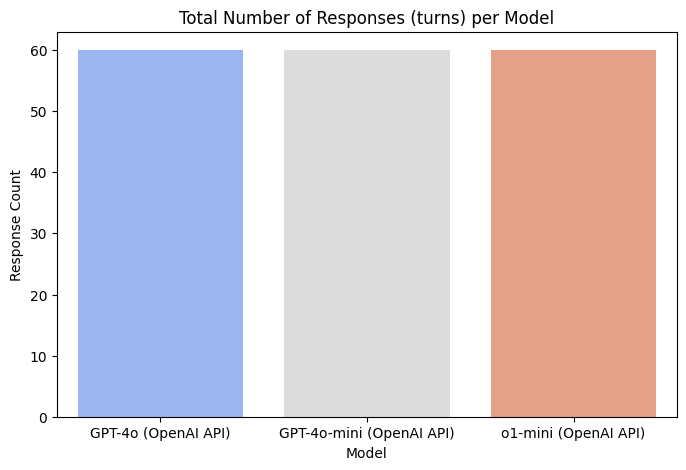

In [13]:
# Count model occurrences
model_counts_multi = df_multi_turn["Model"].value_counts()

# Plot response count
plt.figure(figsize=(8, 5))
sns.barplot(x=model_counts_multi.index, y=model_counts_multi.values, palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("Response Count")
plt.title("Total Number of Responses (turns) per Model")
plt.show()


In [15]:
sentiment_counts = df_multi_turn["Sentiment"].value_counts(bins=[-1, -0.5, 0, 0.5, 1])
print(sentiment_counts)

(0.0, 0.5]        134
(-0.5, 0.0]        31
(0.5, 1.0]          9
(-1.001, -0.5]      6
Name: count, dtype: int64


count    180.000000
mean       0.182699
std        0.219642
min       -0.500000
25%        0.073856
50%        0.212311
75%        0.310219
max        0.800000
Name: Sentiment, dtype: float64


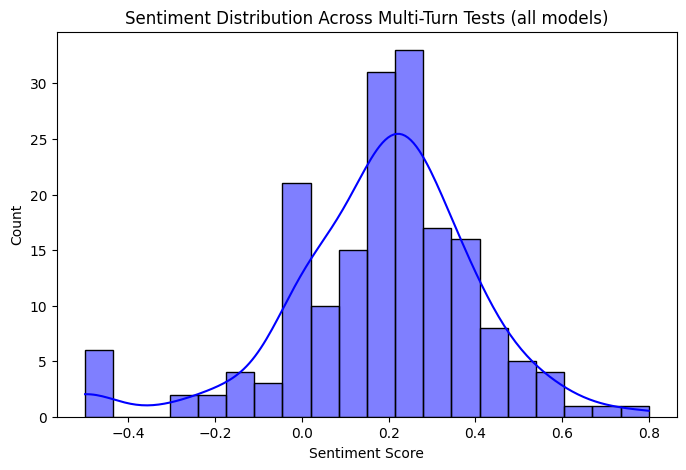

In [14]:
from textblob import TextBlob

# Compute sentiment polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Apply sentiment analysis
df_multi_turn["Sentiment"] = df_multi_turn["Bot Response"].apply(get_sentiment)

# Verify sentiment distribution
print(df_multi_turn["Sentiment"].describe())

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_multi_turn["Sentiment"], bins=20, kde=True, color="blue")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.title("Sentiment Distribution Across Multi-Turn Tests (all models)")
plt.show()


In [16]:
df_multi_turn["Memory Retention"] = df_multi_turn.apply(lambda row: 1 if "remember" in str(row["Bot Response"]).lower() else 0, axis=1)
df_multi_turn["Contradiction"] = df_multi_turn.apply(lambda row: 1 if "but" in str(row["Bot Response"]).lower() or "actually" in str(row["Bot Response"]).lower() else 0, axis=1)
df_multi_turn["Adaptability Score"] = df_multi_turn.apply(lambda row: 1 if "anyways" in str(row["Bot Response"]).lower() or "I see" in str(row["Bot Response"]).lower() else 0, axis=1)


In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon (run once)
nltk.download("vader_lexicon")

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mmokut/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
def analyze_sentiment(text):
    """Uses VADER to analyze sentiment of text"""
    sentiment_score = sia.polarity_scores(str(text))["compound"]  # Get compound score

    if sentiment_score > 0.05:
        return 1  # Positive
    elif sentiment_score < -0.05:
        return -1  # Negative
    else:
        return 0  # Neutral
        


In [19]:
# Apply sentiment scoring function
df_multi_turn["Sentiment"] = df_multi_turn["Bot Response"].apply(analyze_sentiment)

# Verify sentiment column
df_multi_turn.head()


,Turn,Model,Test Name,User Prompt,Bot Response,Sentiment,Memory Retention,Contradiction,Adaptability Score
0,1,GPT-4o (OpenAI API),Engagement & Relevance,"I'm in Nigeria, what's the Capital?",The capital of Nigeria is Abuja.,0,0,0,0
1,2,GPT-4o (OpenAI API),Engagement & Relevance,What about Lagos?,"Lagos is not the capital of Nigeria, but it is...",1,0,1,0
2,3,GPT-4o (OpenAI API),Engagement & Relevance,"That's cool, what of Akwa Ibom?",The capital of Akwa Ibom State in Nigeria is U...,0,0,0,0
3,1,GPT-4o (OpenAI API),Memory & Context Retention,"I'm a new muslim revert, today is the first da...",Congratulations on your decision and welcome t...,1,1,1,0
4,2,GPT-4o (OpenAI API),Memory & Context Retention,My coworkers are going to The Cheesecake Facto...,Going to The Cheesecake Factory with your cowo...,1,0,0,0


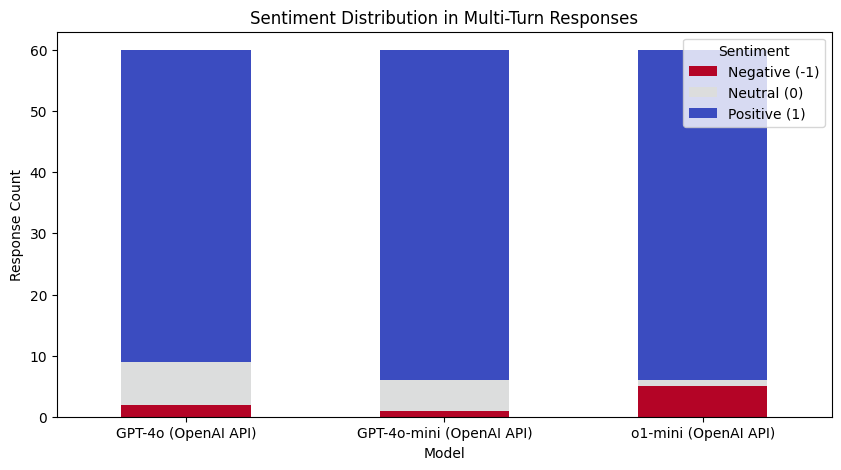

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find distribution per model
sentiment_distribution_multi = df_multi_turn.groupby(["Model", "Sentiment"]).size().unstack(fill_value=0)

# Plot distribution
sentiment_distribution_multi.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="coolwarm_r")
plt.xlabel("Model")
plt.ylabel("Response Count")
plt.title("Sentiment Distribution in Multi-Turn Responses")
plt.xticks(rotation=0)
plt.legend(title="Sentiment", labels=["Negative (-1)", "Neutral (0)", "Positive (1)"])
plt.show()


/var/folders/1l/d95jkyy90vs5p4tnw22bzkth0000gn/T/ipykernel_14289/199828444.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=memory_retention_by_model.index, y=memory_retention_by_model.values, palette="coolwarm")


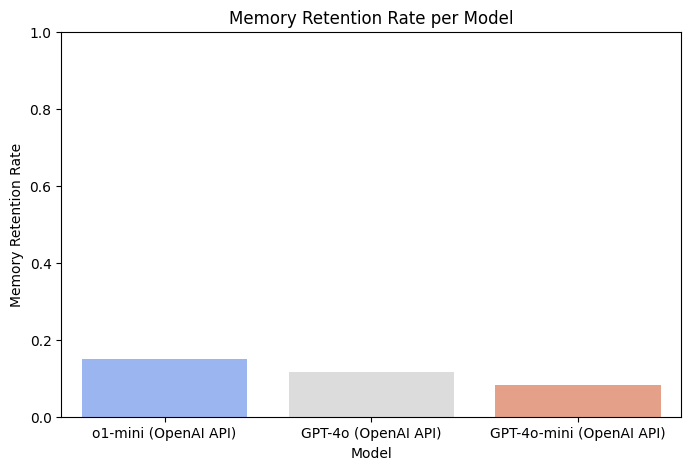

In [21]:
# Compute rate per model
memory_retention_by_model = df_multi_turn.groupby("Model")["Memory Retention"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=memory_retention_by_model.index, y=memory_retention_by_model.values, palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("Memory Retention Rate")
plt.title("Memory Retention Rate per Model")
plt.ylim(0, 1)  #Perentage scale
plt.show()


/var/folders/1l/d95jkyy90vs5p4tnw22bzkth0000gn/T/ipykernel_14289/761863521.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contradiction_by_model.index, y=contradiction_by_model.values, palette="coolwarm")


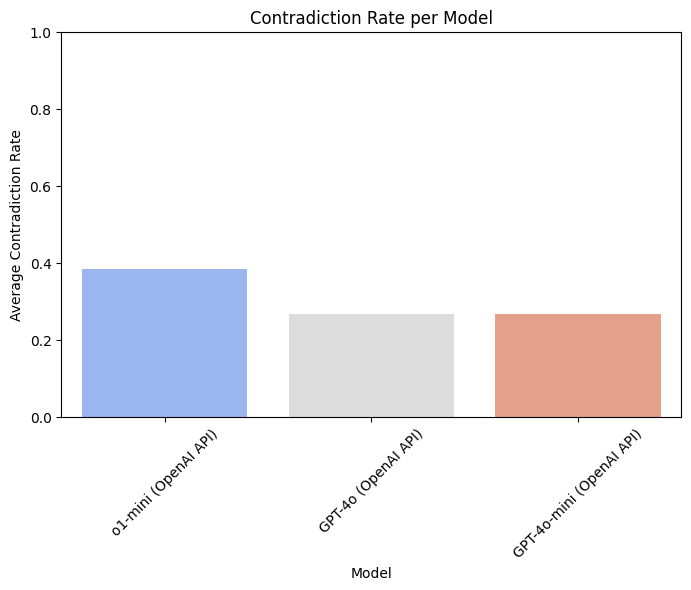

In [22]:
# Compute rate per model
contradiction_by_model = df_multi_turn.groupby("Model")["Contradiction"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=contradiction_by_model.index, y=contradiction_by_model.values, palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("Average Contradiction Rate")
plt.title("Contradiction Rate per Model")
plt.xticks(rotation=45)
plt.ylim(0, 1) 
plt.show()


/var/folders/1l/d95jkyy90vs5p4tnw22bzkth0000gn/T/ipykernel_14289/2216387249.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=adaptability_by_model.index, y=adaptability_by_model.values, palette="coolwarm")


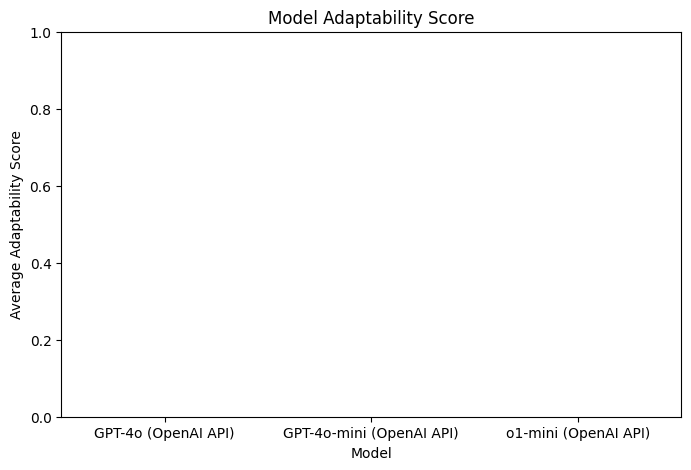

In [23]:
# Compute score per model
adaptability_by_model = df_multi_turn.groupby("Model")["Adaptability Score"].mean().sort_values(ascending=False)

# TODO: FIX TABLE

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=adaptability_by_model.index, y=adaptability_by_model.values, palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("Average Adaptability Score")
plt.title("Model Adaptability Score")
plt.ylim(0, 1) 
plt.show()


/var/folders/1l/d95jkyy90vs5p4tnw22bzkth0000gn/T/ipykernel_14289/1622283841.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_response_length_char_multi.index, y=avg_response_length_char_multi.values, palette="coolwarm")


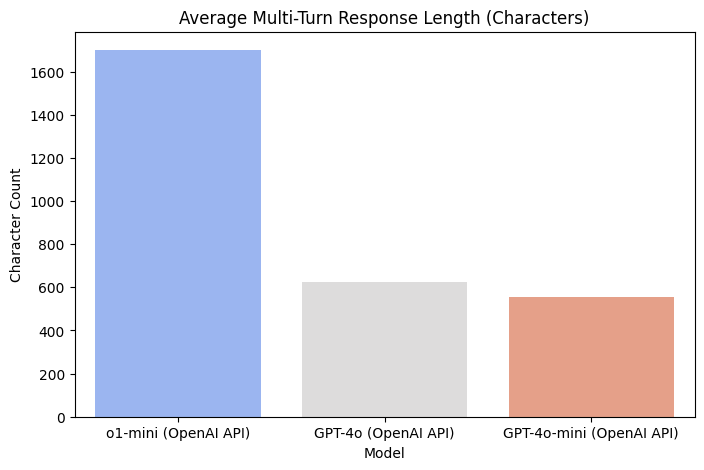

/var/folders/1l/d95jkyy90vs5p4tnw22bzkth0000gn/T/ipykernel_14289/1622283841.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_response_length_word_multi.index, y=avg_response_length_word_multi.values, palette="coolwarm")


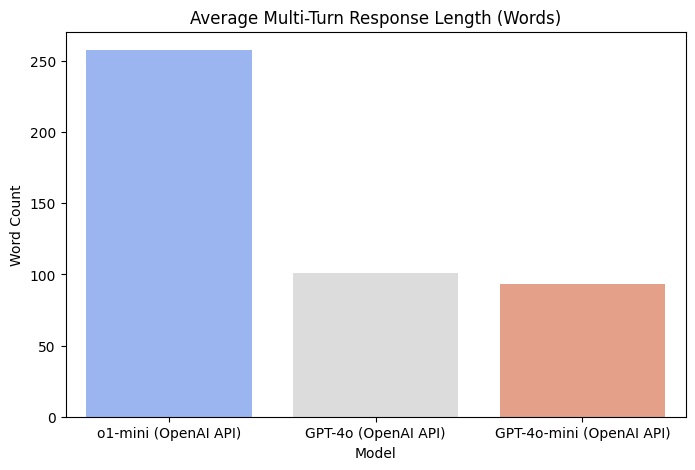

In [24]:
# Calculate res. lengths
df_multi_turn["Character Count"] = df_multi_turn["Bot Response"].apply(lambda x: len(str(x)))
df_multi_turn["Word Count"] = df_multi_turn["Bot Response"].apply(lambda x: len(str(x).split()))

# Find avg model res. lengths
avg_response_length_char_multi = df_multi_turn.groupby("Model")["Character Count"].mean().sort_values(ascending=False)
avg_response_length_word_multi = df_multi_turn.groupby("Model")["Word Count"].mean().sort_values(ascending=False)

# Plot CC
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_response_length_char_multi.index, y=avg_response_length_char_multi.values, palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("Character Count")
plt.title("Average Multi-Turn Response Length (Characters)")
plt.show()

# Plot WC
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_response_length_word_multi.index, y=avg_response_length_word_multi.values, palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("Word Count")
plt.title("Average Multi-Turn Response Length (Words)")
plt.show()
